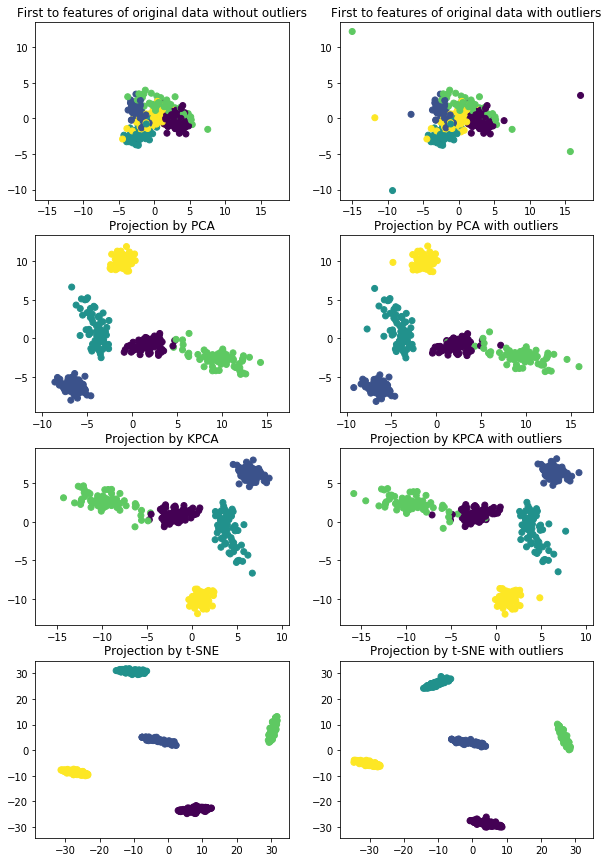

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_spd_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt



def gen_gaussian_data(num_feat=30, num_samples=100, num_class=5):
    means = np.random.normal(loc = 0, scale = 2, size=(num_class, num_feat))
    cov = [make_spd_matrix(num_feat, random_state=None) for i  in range(num_class)]
    x = np.zeros((num_samples*num_class, num_feat))
    y = np.zeros(num_samples*num_class)
    for i in range(num_class):
        x[i*num_samples:(i+1)*num_samples, :] = np.random.multivariate_normal(mean=means[i], cov=cov[i], size=num_samples)
        y[i*num_samples:(i+1)*num_samples] = i
    
    return x, y


def add_outliers(data, num_outliers=10,  features=(0, 1), outlier_mult=4):
    data_copy = np.copy(data)
    sample_ind = [int(x) for x in data.shape[0]*np.random.rand(num_outliers)]
    features =[[features[0]]*len(sample_ind), [features[1]]*len(sample_ind)]
    for i in range(len(features)):
        data_copy[sample_ind, features[i]] = data_copy[sample_ind, features[i]]*outlier_mult 
    
    return data_copy
    
    
X, y = gen_gaussian_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=None)

X_outliers = add_outliers(X_train)

pca = PCA(n_components=2, random_state=123)
pca_result = pca.fit_transform(X_train)
pca_outliers = pca.fit_transform(X_outliers)

kpca = KernelPCA(n_components=2, random_state=123)
kpca_result = kpca.fit_transform(X_train)
kpca_outliers = kpca.fit_transform(X_outliers)

tsne_result = TSNE(random_state=123).fit_transform(X_train)
tsne_outliers = TSNE(random_state=123).fit_transform(X_outliers)

# Need to convert X to only having positive elements
#nmf = NMF(n_components=5, solver="mu")
#W = nmf.fit_transform(X_train)
#H = nmf.components_


f = plt.figure(figsize=(10,15))
ax2 = f.add_subplot(422)
ax1 = f.add_subplot(421, sharex=ax2, sharey=ax2)
ax4 = f.add_subplot(424)
ax3 = f.add_subplot(423, sharex=ax4, sharey=ax4)
ax6 = f.add_subplot(426)
ax5 = f.add_subplot(425, sharex=ax6, sharey=ax6)
ax8 = f.add_subplot(428)
ax7 = f.add_subplot(427, sharex=ax8, sharey=ax8)


ax1.scatter(X_train[:,0], X_train[:,1], c=y_train)
ax1.set_title("First two features of original data without outliers")
ax2.scatter(X_outliers[:,0], X_outliers[:,1], c=y_train)
ax2.set_title("First two features of original data with outliers")
     
ax3.scatter(pca_result[:,0], pca_result[:,1], c=y_train)
ax3.set_title("Projection by PCA")
ax4.scatter(pca_outliers[:,0], pca_outliers[:,1], c=y_train)
ax4.set_title("Projection by PCA with outliers")

ax5.scatter(kpca_result[:,0], kpca_result[:,1], c=y_train)
ax5.set_title("Projection by KPCA")
ax6.scatter(kpca_outliers[:,0], kpca_outliers[:,1], c=y_train)
ax6.set_title("Projection by KPCA with outliers")

ax7.scatter(tsne_result[:,0], tsne_result[:,1], c=y_train)
ax7.set_title("Projection by t-SNE")
ax8.scatter(tsne_outliers[:,0], tsne_outliers[:,1], c=y_train)
ax8.set_title("Projection by t-SNE with outliers")

plt.show()


In [42]:
a = np.array([[1, 2, 3, 4, 5], [3, 4, 5 ,6, 7]])
print(a[(0, 1), 2])

[3 5]
